In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
data = pd.read_csv('Demographic_Data.csv')
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [4]:
dataframe = data

In [5]:
variable_name = dataframe.iloc[:,0:4]

In [6]:
#features
X = data.iloc[:,0:4]
print('Summary of feature sample')
X.head()

Summary of feature sample


,in-store,age,items,amount
0,0,37,4,281.03
1,0,35,2,219.51
2,1,45,3,1525.70
3,1,46,3,715.25
4,1,33,4,1937.50


In [7]:
#dependent variable
y = data['region']

In [8]:
y.head()

0    2
1    2
2    4
3    3
4    1
Name: region, dtype: int64

In [9]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [10]:
X_train.head()

,in-store,age,items,amount
25183,1,27,4,700.19
37715,1,44,3,825.29
38347,0,50,5,315.27
4589,1,20,4,1923.90
78269,0,35,3,2503.80


In [11]:
y_train.head()

25183    4
37715    4
38347    2
4589     1
78269    3
Name: region, dtype: int64

In [12]:
#Modeling (Classification)
algo = DecisionTreeClassifier(max_depth=3)
model = algo.fit(X_train,y_train)

In [13]:
#Predictions
preds = model.predict(X_test)

In [14]:
preds

array([2, 4, 3, ..., 1, 1, 4], dtype=int64)

In [15]:
accuracy_score(preds, y_test)

0.63725

In [16]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.41      0.67      0.51      4857
           2       0.90      1.00      0.95      5945
           3       0.56      0.11      0.18      5389
           4       0.65      0.70      0.68      7809

    accuracy                           0.64     24000
   macro avg       0.63      0.62      0.58     24000
weighted avg       0.64      0.64      0.60     24000



In [17]:
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus

C:\anaconda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [18]:
region_values = ['0','1','2','3'] #this is just a list specifying the region classes

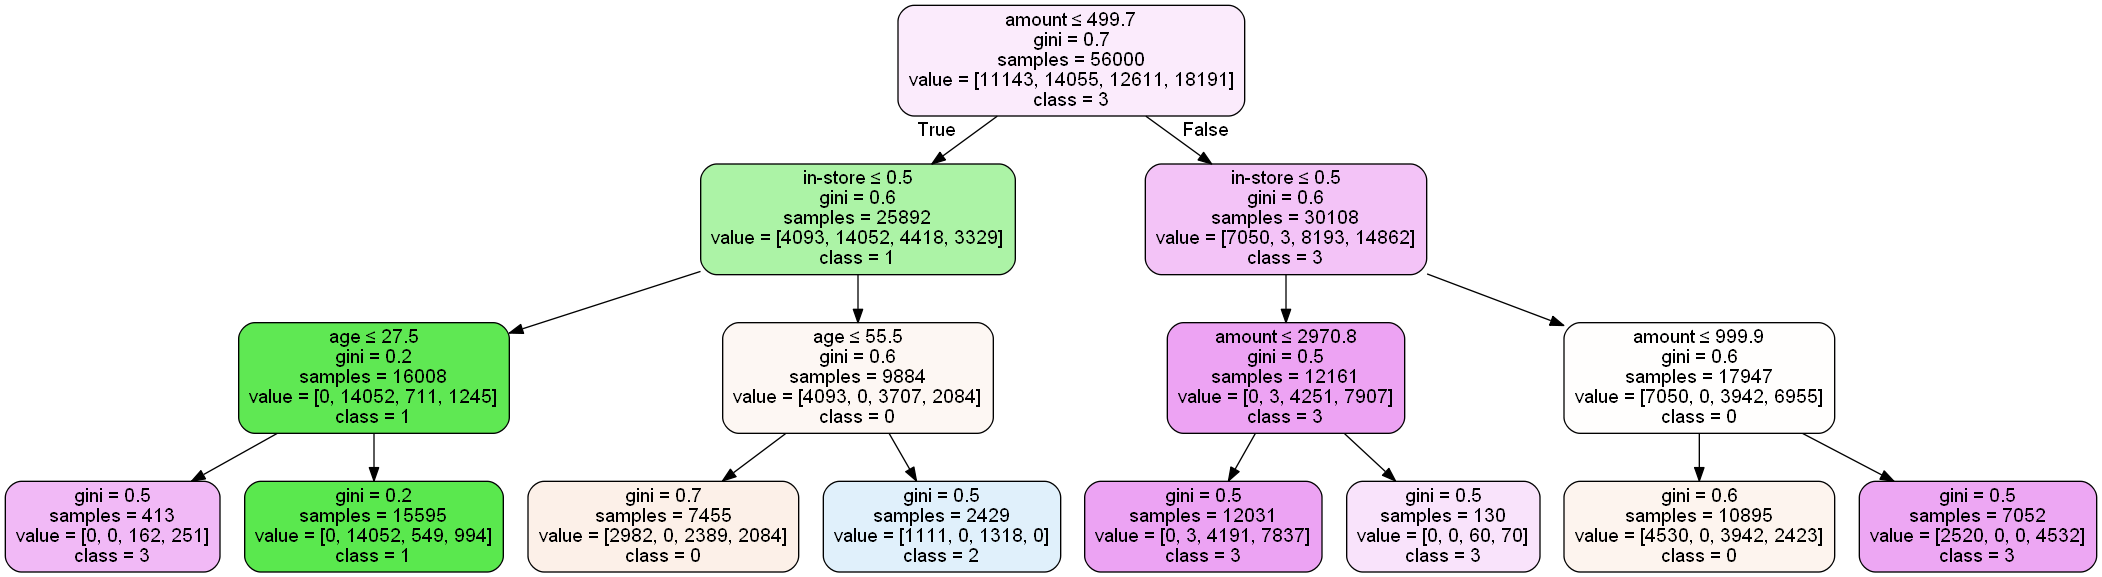

In [19]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, 
    filled=True, rounded=True,
    feature_names=X.columns, 
    class_names=region_values,label='all',precision=1,
    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())